<a href="https://colab.research.google.com/github/shauryapanhale/skill2/blob/main/skill_exp_7%2C8%2C9%2C10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [32]:
import pandas as pd
import numpy as np
from sklearn.feature_selection import f_classif
file_path = "/content/hifi.csv"  # Update path if needed
df = pd.read_csv(file_path)

# Define numerical features and target variable
numerical_features = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
target_column = 'Job_Offers'

# Ensure the target column is numeric (ANOVA requires numeric target categories)
df[target_column] = pd.to_numeric(df[target_column])

# Perform ANOVA F-Test
f_scores, p_values = f_classif(df[numerical_features], df[target_column])

# Display feature scores
print("\n===== ANOVA Feature Selection Results =====")
for feature, score, p_value in zip(numerical_features, f_scores, p_values):
    print(f"Feature: {feature}, Score: {score:.2f}, p-value: {p_value:.4f}")

# Optional: Filter features with a p-value less than 0.05 (statistically significant)
significant_features = [feature for feature, p in zip(numerical_features, p_values) if p < 0.05]

print("\nStatistically Significant Features (p < 0.05):")
print(significant_features)


===== ANOVA Feature Selection Results =====
Feature: Age, Score: 1.44, p-value: 0.2069
Feature: High_School_GPA, Score: 1.09, p-value: 0.3640
Feature: SAT_Score, Score: 1.07, p-value: 0.3721
Feature: University_Ranking, Score: 0.94, p-value: 0.4533
Feature: University_GPA, Score: 0.38, p-value: 0.8639
Feature: Internships_Completed, Score: 1.58, p-value: 0.1615
Feature: Projects_Completed, Score: 1.39, p-value: 0.2249
Feature: Certifications, Score: 1.20, p-value: 0.3057
Feature: Soft_Skills_Score, Score: 1.54, p-value: 0.1733
Feature: Networking_Score, Score: 1.34, p-value: 0.2435
Feature: Job_Offers, Score: inf, p-value: 0.0000
Feature: Starting_Salary, Score: 1.84, p-value: 0.1015
Feature: Career_Satisfaction, Score: 1.63, p-value: 0.1490
Feature: Years_to_Promotion, Score: 0.85, p-value: 0.5112
Feature: Work_Life_Balance, Score: 0.50, p-value: 0.7748

Statistically Significant Features (p < 0.05):
['Job_Offers']


/usr/local/lib/python3.11/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: RuntimeWarning: divide by zero encountered in divide
  f = msb / msw


In [33]:
import pandas as pd
import numpy as np
from sklearn.feature_selection import SelectKBest, chi2

# Define categorical features and target variable
categorical_features = ['Gender', 'Field_of_Study', 'Current_Job_Level', 'Entrepreneurship']
target_column = 'Job_Offers'  # Ensure this is a categorical variable

# Convert categorical features into numerical using one-hot encoding
df_encoded = pd.get_dummies(df[categorical_features])

# Perform Chi-Square test using SelectKBest
k = 5  # Number of top features to select
selector = SelectKBest(score_func=chi2, k='all')  # Initially select all
X_new = selector.fit_transform(df_encoded, df[target_column])

# Get feature scores
feature_scores = selector.scores_
threshold = np.percentile(feature_scores, 50)  # Select features above median score

# Get top-K features
top_k_selector = SelectKBest(score_func=chi2, k=k)
X_k_new = top_k_selector.fit_transform(df_encoded, df[target_column])
selected_k_features = np.array(df_encoded.columns)[top_k_selector.get_support()]
top_k_scores = top_k_selector.scores_[top_k_selector.get_support()]

# Display results for threshold-based selection
print("\n===== Chi-Square Features (Above Threshold) =====")
for feature, score in zip(df_encoded.columns, feature_scores):
    if score >= threshold:
        print(f"Feature: {feature}, Score: {score}")

# Display results for top-K selection
print("\n===== Top-K Chi-Square Features =====")
for feature, score in zip(selected_k_features, top_k_scores):
    print(f"Feature: {feature}, Score: {score}")


===== Chi-Square Features (Above Threshold) =====
Feature: Gender_Other, Score: 13.260404286393834
Feature: Field_of_Study_Business, Score: 2.2230357215979746
Feature: Field_of_Study_Engineering, Score: 2.165219804525695
Feature: Field_of_Study_Law, Score: 4.893303885081975
Feature: Field_of_Study_Mathematics, Score: 5.971140754159593
Feature: Field_of_Study_Medicine, Score: 4.735997447339847
Feature: Current_Job_Level_Senior, Score: 10.977924745217512
Feature: Entrepreneurship_Yes, Score: 2.270124102426917

===== Top-K Chi-Square Features =====
Feature: Gender_Other, Score: 13.260404286393834
Feature: Field_of_Study_Law, Score: 4.893303885081975
Feature: Field_of_Study_Mathematics, Score: 5.971140754159593
Feature: Field_of_Study_Medicine, Score: 4.735997447339847
Feature: Current_Job_Level_Senior, Score: 10.977924745217512


In [34]:
import pandas as pd
import numpy as np
from sklearn.feature_selection import mutual_info_classif, SelectKBest

# Define target variable
target_column = 'Career_Satisfaction'  # Replace with actual categorical target

# Encode categorical target
df[target_column] = df[target_column].astype('category').cat.codes

# Select numerical features
numerical_features = df.select_dtypes(include=['int64', 'float64']).columns.tolist()

# Compute mutual information (information gain)
mi_scores = mutual_info_classif(df[numerical_features], df[target_column])

# Apply threshold-based filtering
threshold = np.percentile(mi_scores, 50)  # Select features above the 50th percentile

# Get top-K features
k = 5  # Number of top features to select
top_k_selector = SelectKBest(score_func=mutual_info_classif, k=k)
X_k_new = top_k_selector.fit_transform(df[numerical_features], df[target_column])
selected_k_features = np.array(numerical_features)[top_k_selector.get_support()]
top_k_scores = top_k_selector.scores_[top_k_selector.get_support()]

# Display results for threshold-based selection
print("\n===== Information Gain (Above Threshold) =====")
for feature, score in zip(numerical_features, mi_scores):
    if score >= threshold:
        print(f"Feature: {feature}, Information Gain: {score}")

# Display results for top-K selection
print("\n===== Top-K Information Gain Features =====")
for feature, score in zip(selected_k_features, top_k_scores):
    print(f"Feature: {feature}, Information Gain: {score}")


===== Information Gain (Above Threshold) =====
Feature: Internships_Completed, Information Gain: 0.008854552312390851
Feature: Projects_Completed, Information Gain: 0.008166964636513452
Feature: Certifications, Information Gain: 0.0019822879334130405
Feature: Soft_Skills_Score, Information Gain: 0.019072585777891504
Feature: Networking_Score, Information Gain: 0.01190971487450243
Feature: Job_Offers, Information Gain: 0.004072834663833458
Feature: Years_to_Promotion, Information Gain: 0.005662358485998276

===== Top-K Information Gain Features =====
Feature: University_GPA, Information Gain: 0.006019873545600518
Feature: Internships_Completed, Information Gain: 0.01225937569604385
Feature: Starting_Salary, Information Gain: 0.0
Feature: Years_to_Promotion, Information Gain: 0.0
Feature: Work_Life_Balance, Information Gain: 0.0



===== Pearson Correlation Test =====
Feature: Age, Correlation: 0.013170567161754153
Feature: High_School_GPA, Correlation: -0.009152127875674551
Feature: SAT_Score, Correlation: 0.002775831170236925
Feature: University_Ranking, Correlation: 0.021368363488632282
Feature: University_GPA, Correlation: 0.0010224852506391033
Feature: Internships_Completed, Correlation: 0.01807973475529372
Feature: Projects_Completed, Correlation: 0.01519215654460664
Feature: Certifications, Correlation: -0.018366976570816766
Feature: Soft_Skills_Score, Correlation: 0.0048700677454724135
Feature: Networking_Score, Correlation: 0.0026219386330834545
Feature: Job_Offers, Correlation: -0.034014274547999185
Feature: Years_to_Promotion, Correlation: 0.005674118096864106
Feature: Work_Life_Balance, Correlation: 0.006370631587761241

===== Features Above Correlation Threshold =====

===== Correlation Matrix =====
                            Age  High_School_GPA  SAT_Score  \
Age                    1.000000       

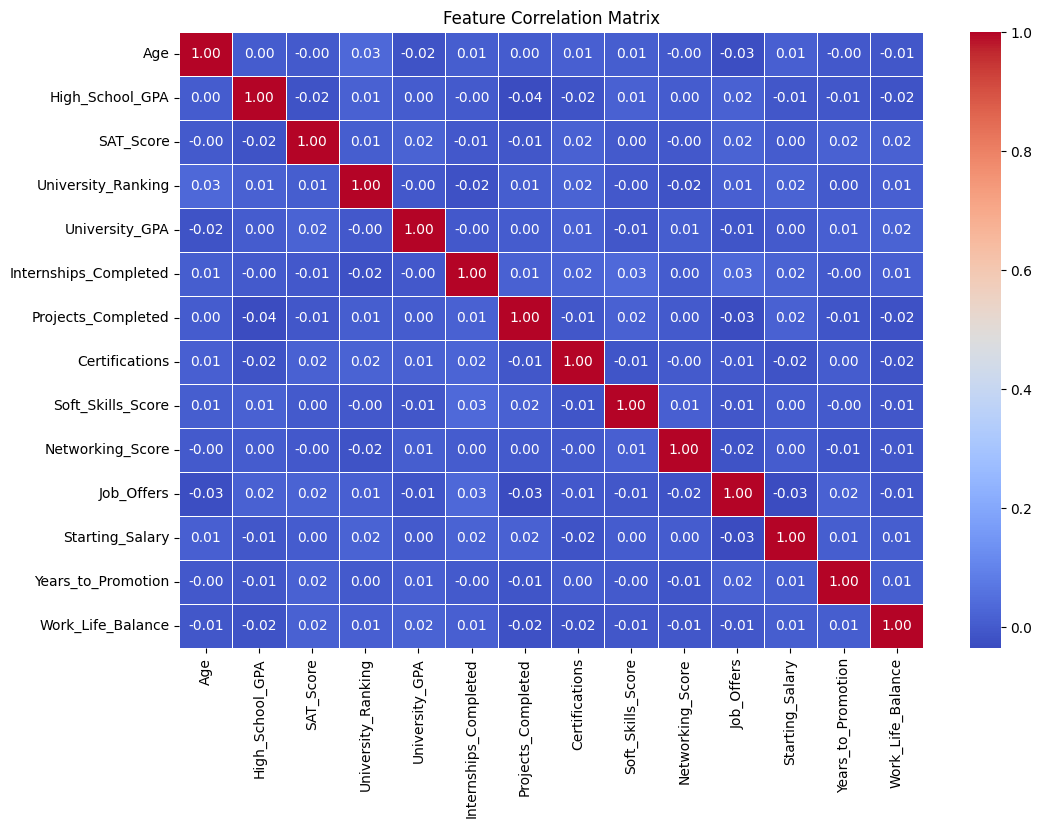

In [36]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import pearsonr
# Define numerical features and target column
target_column = 'Starting_Salary'  # Replace with actual numeric target if different
numerical_features = df.select_dtypes(include=['int64', 'float64']).columns.tolist()

# Check if the target column exists in your DataFrame
if target_column not in df.columns:
    raise KeyError(f"The target column '{target_column}' is not found in the DataFrame.")

# Compute Pearson correlation for each feature with target
correlation_results = {}

print("\n===== Pearson Correlation Test =====")
for feature in numerical_features:
    if feature != target_column:
        corr, _ = pearsonr(df[feature], df[target_column])
        correlation_results[feature] = corr
        print(f"Feature: {feature}, Correlation: {corr}")

# Apply threshold-based filtering
threshold = 0.2  # Change this as needed (absolute correlation threshold)
filtered_features = {k: v for k, v in correlation_results.items() if abs(v) >= threshold}

# Display filtered features
print("\n===== Features Above Correlation Threshold =====")
for feature, corr in filtered_features.items():
    print(f"Feature: {feature}, Correlation: {corr}")

# Create correlation matrix
correlation_matrix = df[numerical_features].corr()

# Display correlation matrix
print("\n===== Correlation Matrix =====")
print(correlation_matrix)

# Plot heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Feature Correlation Matrix")
plt.show()


===== Pearson Correlation Test =====
Feature: Age, Correlation: 0.013170567161754153
Feature: High_School_GPA, Correlation: -0.009152127875674551
Feature: SAT_Score, Correlation: 0.002775831170236925
Feature: University_Ranking, Correlation: 0.021368363488632282
Feature: University_GPA, Correlation: 0.0010224852506391033
Feature: Internships_Completed, Correlation: 0.01807973475529372
Feature: Projects_Completed, Correlation: 0.01519215654460664
Feature: Certifications, Correlation: -0.018366976570816766
Feature: Soft_Skills_Score, Correlation: 0.0048700677454724135
Feature: Networking_Score, Correlation: 0.0026219386330834545
Feature: Job_Offers, Correlation: -0.034014274547999185
Feature: Career_Satisfaction, Correlation: 0.0024221792348127196
Feature: Years_to_Promotion, Correlation: 0.005674118096864106
Feature: Work_Life_Balance, Correlation: 0.006370631587761241

===== Features Above Correlation Threshold =====

===== Correlation Matrix =====
                            Age  Hig

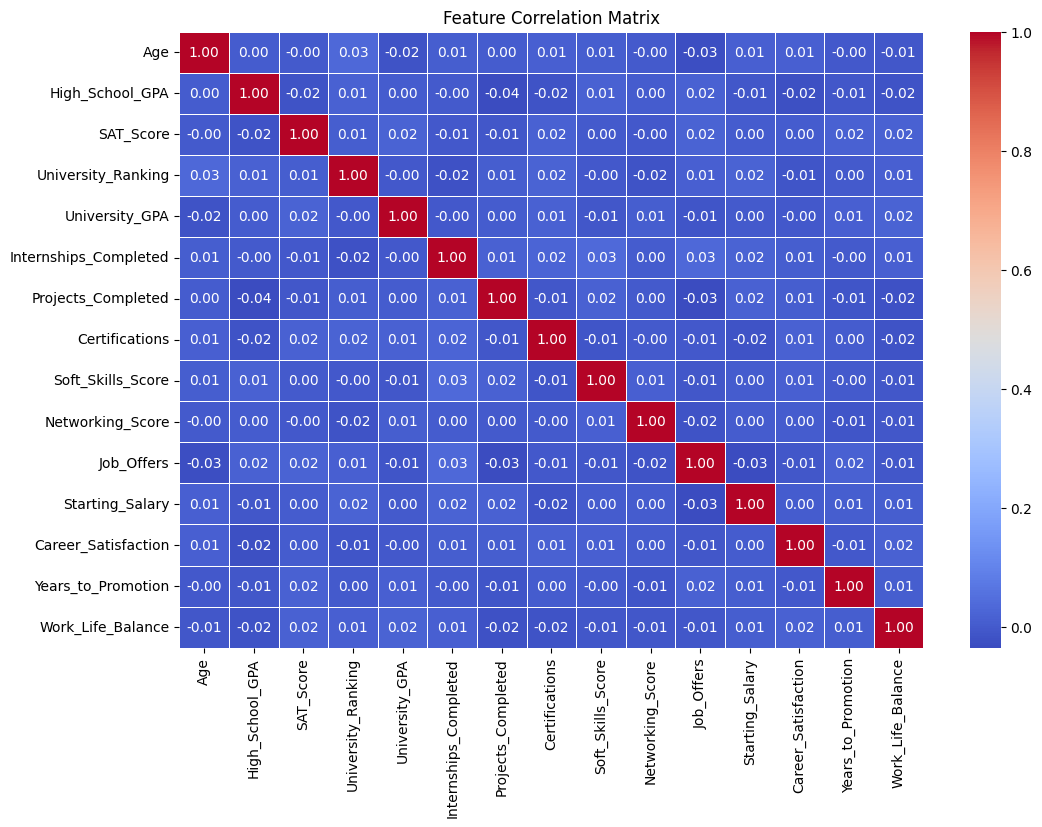

In [43]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import pearsonr
file_path = "/content/hifi.csv"  # Update path if needed
df = pd.read_csv(file_path)

# Define numerical features and target column
target_column = 'Starting_Salary'  # Replace with actual numeric target if different
numerical_features = df.select_dtypes(include=['int64', 'float64']).columns.tolist()

# Check if the target column exists in your DataFrame
if target_column not in df.columns:
    raise KeyError(f"The target column '{target_column}' is not found in the DataFrame.")

# Compute Pearson correlation for each feature with target
correlation_results = {}

print("\n===== Pearson Correlation Test =====")
for feature in numerical_features:
    if feature != target_column:
        corr, _ = pearsonr(df[feature], df[target_column])
        correlation_results[feature] = corr
        print(f"Feature: {feature}, Correlation: {corr}")

# Apply threshold-based filtering
threshold = 0.7  # Change this as needed (absolute correlation threshold)
filtered_features = {k: v for k, v in correlation_results.items() if abs(v) >= threshold}

# Display filtered features
print("\n===== Features Above Correlation Threshold =====")
for feature, corr in filtered_features.items():
    print(f"Feature: {feature}, Correlation: {corr}")

# Create correlation matrix
correlation_matrix = df[numerical_features].corr()

# Display correlation matrix
print("\n===== Correlation Matrix =====")
print(correlation_matrix)

# Plot heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Feature Correlation Matrix")
plt.show()

In [38]:
import pandas as pd
import statsmodels.api as sm
from sklearn.preprocessing import LabelEncoder


# Define features and target
X = df.drop('Job_Offers', axis=1)
y = df['Job_Offers']

# Encode categorical columns
for col in X.select_dtypes(include='object').columns:
    X[col] = LabelEncoder().fit_transform(X[col])

# Forward Selection
selected_features = []
remaining_features = list(X.columns)

for _ in range(len(remaining_features)):
    best_score = float('-inf')
    best_feature = None

    for feature in remaining_features:
        trial_features = selected_features + [feature]
        X_trial = sm.add_constant(X[trial_features])
        model = sm.OLS(y, X_trial).fit()

        if model.rsquared > best_score:
            best_score = model.rsquared
            best_feature = feature

    if best_feature is not None:
        selected_features.append(best_feature)
        remaining_features.remove(best_feature)

print("Selected Features (Forward Selection):", selected_features)

Selected Features (Forward Selection): ['Starting_Salary', 'Internships_Completed', 'Projects_Completed', 'Age', 'SAT_Score', 'Networking_Score', 'Years_to_Promotion', 'High_School_GPA', 'University_GPA', 'Gender', 'University_Ranking', 'Entrepreneurship', 'Work_Life_Balance', 'Current_Job_Level', 'Student_ID', 'Soft_Skills_Score', 'Certifications', 'Field_of_Study', 'Career_Satisfaction']


In [39]:
import statsmodels.api as sm

# Start with all features
features = list(X.columns)
X_with_const = sm.add_constant(X[features])

while len(features) > 0:
    model = sm.OLS(y, X_with_const).fit()
    p_values = model.pvalues[1:]

    worst_p = p_values.idxmax()
    if p_values[worst_p] > 0.05:
        features.remove(worst_p)
        X_with_const = sm.add_constant(X[features])
    else:
        break

print("Selected Features (Backward Elimination):", features)


Selected Features (Backward Elimination): ['Age', 'Internships_Completed', 'Projects_Completed', 'Starting_Salary']


In [40]:
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor()
rfe = RFE(model, n_features_to_select=5)
fit = rfe.fit(X, y)

selected_features = X.columns[fit.support_].tolist()
print("Selected Features (RFE):", selected_features)

Selected Features (RFE): ['Student_ID', 'SAT_Score', 'University_Ranking', 'University_GPA', 'Starting_Salary']


In [42]:

from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor()
cv_scores = cross_val_score(model, X, y, cv=5, scoring='r2')

print("Cross-Validation Scores:", cv_scores)
print("Average CV Score:", cv_scores.mean())

Cross-Validation Scores: [-0.01961139 -0.04524745 -0.01954405 -0.01580331 -0.02998565]
Average CV Score: -0.02603836917485598
